<h2 style="text-align: center;">🚰 SERVICIOS BÁSICOS DE SANEAMIENTO </h2>

**📊 Código del indicador WB:** `SH.STA.BASS.ZS`

**🔍 Enfoque de análisis:**  
El acceso a servicios básicos de saneamiento es un pilar fundamental para la salud pública y la prevención de enfermedades.  
En Sudamérica, la infraestructura sanitaria adecuada **reduce la exposición a agentes patógenos**, previene brotes de enfermedades infecciosas y contribuye a mejorar el estado nutricional, especialmente en la infancia.

Este indicador permite observar cómo la mejora en **saneamiento, agua potable y gestión de residuos** impacta directamente en la reducción de la desnutrición y la carga de enfermedades, fortaleciendo el bienestar general de la población.

**📌 Región de análisis:** Sudamérica  
**🧩 Relación clave:** Deficiencia en saneamiento ⟶ mayor riesgo de infecciones ⟶ mayor desnutrición y morbilidad

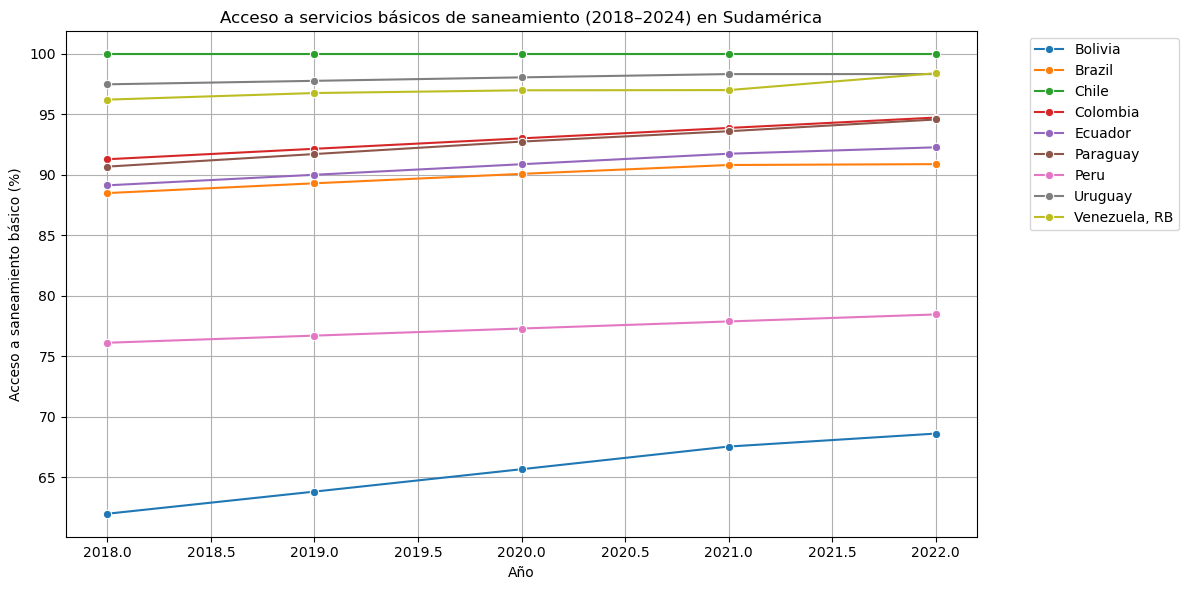

C:\Users\Nathan Pedraza\AppData\Local\Temp\ipykernel_5368\4053499646.py:78: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




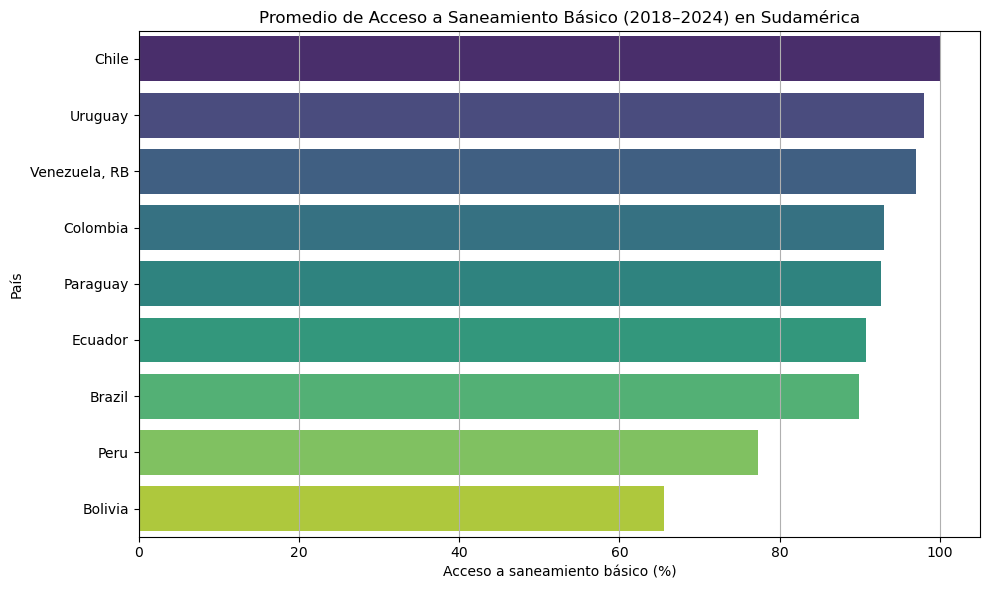

In [4]:
# --- ANÁLISIS DE SERVICIOS BÁSICOS DE SANEAMIENTO EN SUDAMÉRICA ---
# 1. Importar librerías
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 2. Definir la URL y parámetros para la API del Banco Mundial
url_base = "https://api.worldbank.org/v2/country/all/indicator/SH.STA.BASS.ZS"
params = {
    "format": "json",
    "per_page": 1000,
    "page": 1
}

# 3. Descargar y procesar los datos
todos_los_datos = []
respuesta = requests.get(url_base, params=params)
data = respuesta.json()
paginas_totales = data[0]['pages']

for pagina in range(1, paginas_totales + 1):
    params["page"] = pagina
    respuesta = requests.get(url_base, params=params)
    data = respuesta.json()
    registros = data[1]
    for r in registros:
        if r["value"] is not None:
            todos_los_datos.append({
                "País": r["country"]["value"],
                "Año": int(r["date"]),
                "Acceso a saneamiento básico (%)": float(r["value"])
            })

df = pd.DataFrame(todos_los_datos)

# 4. Filtrar países sudamericanos y años recientes
paises_sudamericanos = [
    "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador",
    "Paraguay", "Peru", "Uruguay", "Venezuela, RB"
]
df_filtrado = df[
    (df["País"].isin(paises_sudamericanos)) &
    (df["Año"].between(2018, 2024))
].sort_values(by=["País", "Año"])

# 5. Guardar la base de datos filtrada
df_filtrado.to_excel("Servicios_Basicos_Saneamiento.xlsx", index=False)

# 6. Crear carpeta para gráficos si no existe
os.makedirs("Graphs", exist_ok=True)

# 7. Visualización: Línea de tiempo del acceso a saneamiento básico
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_filtrado,
    x="Año",
    y="Acceso a saneamiento básico (%)",
    hue="País",
    marker="o"
)
plt.title("Acceso a servicios básicos de saneamiento (2018–2024) en Sudamérica")
plt.ylabel("Acceso a saneamiento básico (%)")
plt.xlabel("Año")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("Graphs/linea_tiempo_saneamiento.png")
plt.show()

# 8. Análisis descriptivo: Promedio de acceso por país
promedios = df_filtrado.groupby("País")["Acceso a saneamiento básico (%)"].mean().reset_index()
promedios = promedios.sort_values(by="Acceso a saneamiento básico (%)", ascending=False)

# Gráfico de barras horizontal del promedio
plt.figure(figsize=(10, 6))
sns.barplot(
    data=promedios,
    x="Acceso a saneamiento básico (%)",
    y="País",
    palette="viridis"
)
plt.title("Promedio de Acceso a Saneamiento Básico (2018–2024) en Sudamérica")
plt.xlabel("Acceso a saneamiento básico (%)")
plt.ylabel("País")
plt.grid(axis='x')
plt.tight_layout()
plt.savefig("Graphs/promedio_acceso_saneamiento.png")
plt.show()


# 9. Conclusión (Markdown)
display(Markdown("""
### Conclusión

El análisis evidencia que el acceso a servicios básicos de saneamiento en Sudamérica presenta importantes diferencias entre países. Chile y Uruguay lideran con los mayores porcentajes de cobertura, reflejando sistemas de infraestructura sanitaria robustos y una menor incidencia de enfermedades relacionadas con la desnutrición. Por el contrario, Bolivia y Venezuela muestran los niveles más bajos, lo que se traduce en una mayor vulnerabilidad a infecciones y problemas nutricionales.

La infraestructura sanitaria es un factor preventivo clave: donde el acceso es limitado, la exposición a agentes patógenos aumenta, elevando el riesgo de enfermedades gastrointestinales y desnutrición, especialmente en la infancia. La mejora en saneamiento básico no solo reduce la carga de enfermedades, sino que también contribuye a un mejor desarrollo físico y cognitivo de la población.

Invertir en infraestructura sanitaria debe ser una prioridad para los gobiernos sudamericanos. La evidencia muestra que los países con mayor acceso a saneamiento básico presentan mejores indicadores de salud y nutrición, lo que impacta directamente en la calidad de vida y el desarrollo humano. La reducción de brechas en saneamiento es esencial para avanzar hacia sociedades más saludables, equitativas y resilientes frente a futuras crisis sanitarias.
""") )